##Maping DC Ward 1 crime

In [2]:
import os
os.environ['data_dir'] = "/media/j/TOSHIBA1/OneDrive - University of South Carolina - Moore School of Business/PYTHON/DC_crime/Data"


/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


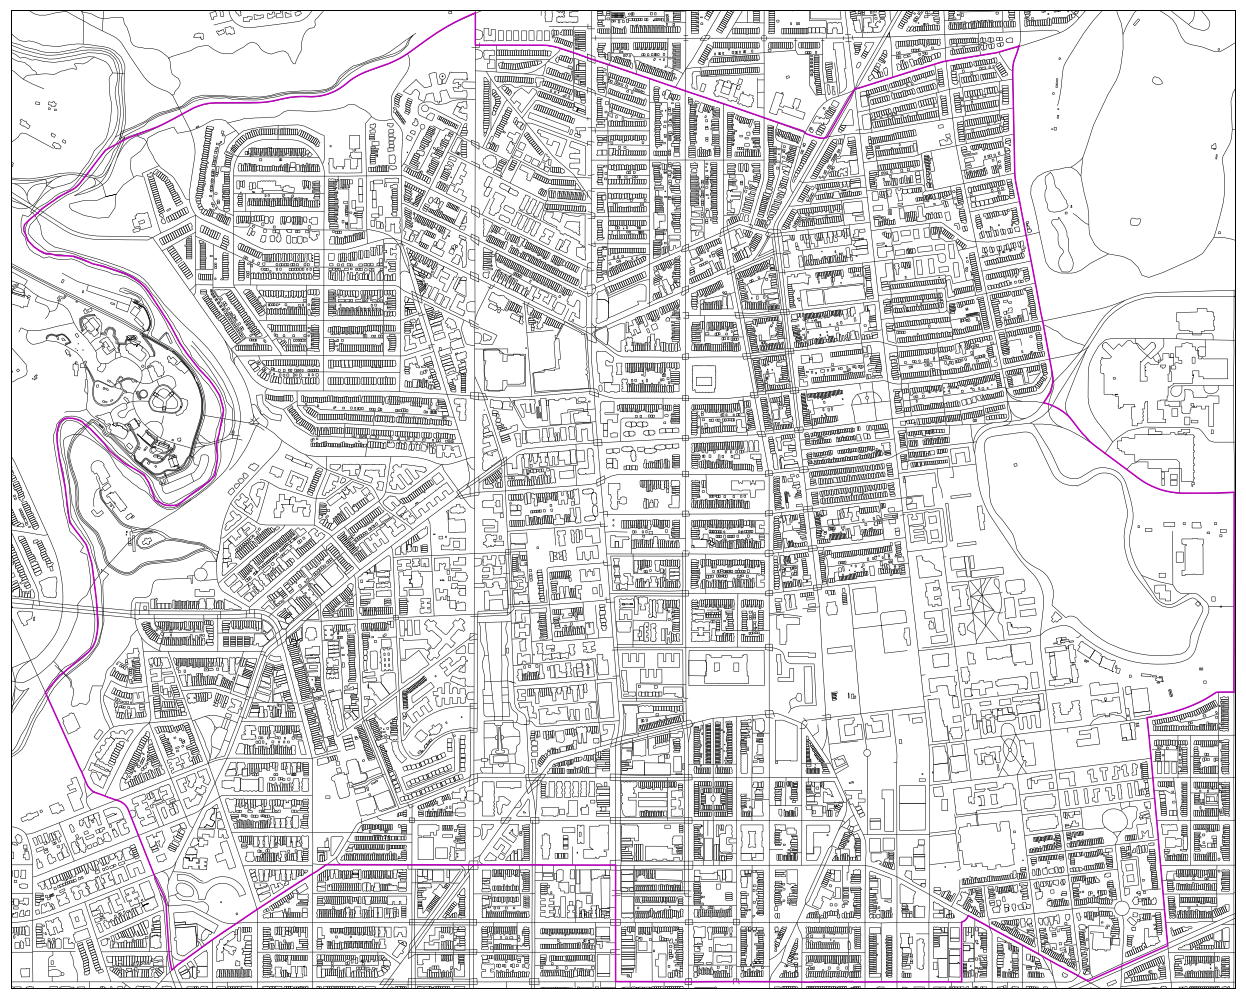

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
plt.figure(figsize=(36, 18))

map = Basemap(resolution= 'h',projection= 'aea',llcrnrlon=-77.051325, llcrnrlat= 38.913931, urcrnrlon=-77.0121, urcrnrlat=38.938311,lat_0= 38.926139, lon_0= -77.031688)
map.drawcoastlines()
map.drawmapboundary(fill_color= 'aqua') #fills map with aqua
map.fillcontinents(color='white', lake_color='aqua') #fills continents with coral and lakes with aqua

os.chdir(os.environ['data_dir'])
os.chdir('Ward_from_2012')

#os.chdir(r'D:\OneDrive - University of South Carolina - Moore School of Business\DC_crime\Data\Ward_from_2012')

map.readshapefile('Ward_from_2012', 'ward_shapefile', drawbounds = False)

os.chdir(os.environ['data_dir'])
os.chdir('geofabrik')

#os.chdir(r'D:\OneDrive - University of South Carolina - Moore School of Business\DC_crime\Data\geofabrik')

map.readshapefile('roads_free_1', 'roads')

map.readshapefile('buildings_a_free_1', 'buildings')

map.readshapefile('water_a_free_1', 'water1')

map.readshapefile('waterways_free_1', 'water2')


os.chdir(os.environ['data_dir'])
os.chdir('test_crime_shapefile')

map.readshapefile('latlon', 'crime')

for info, shape in zip(map.ward_shapefile_info, map.ward_shapefile):
    if info['WARD'] == 1:
        x, y = zip(*shape) 
        map.plot(x, y, marker=None,color='m')

for info, crime in zip(map.crime_info, map.crime):
    map.plot(crime[0], crime[1], marker='o', color='r')
plt.show()


prelim, partial map of crime where crime shapefile (after conversion from NAD83 to WGS84 ) is located at D:\OneDrive - University of South Carolina - Moore School of Business\DC_crime\Data\test_crime_shapefile. Since data is aggregated to center block, need a way to emphasize magnitude.

/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/j/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


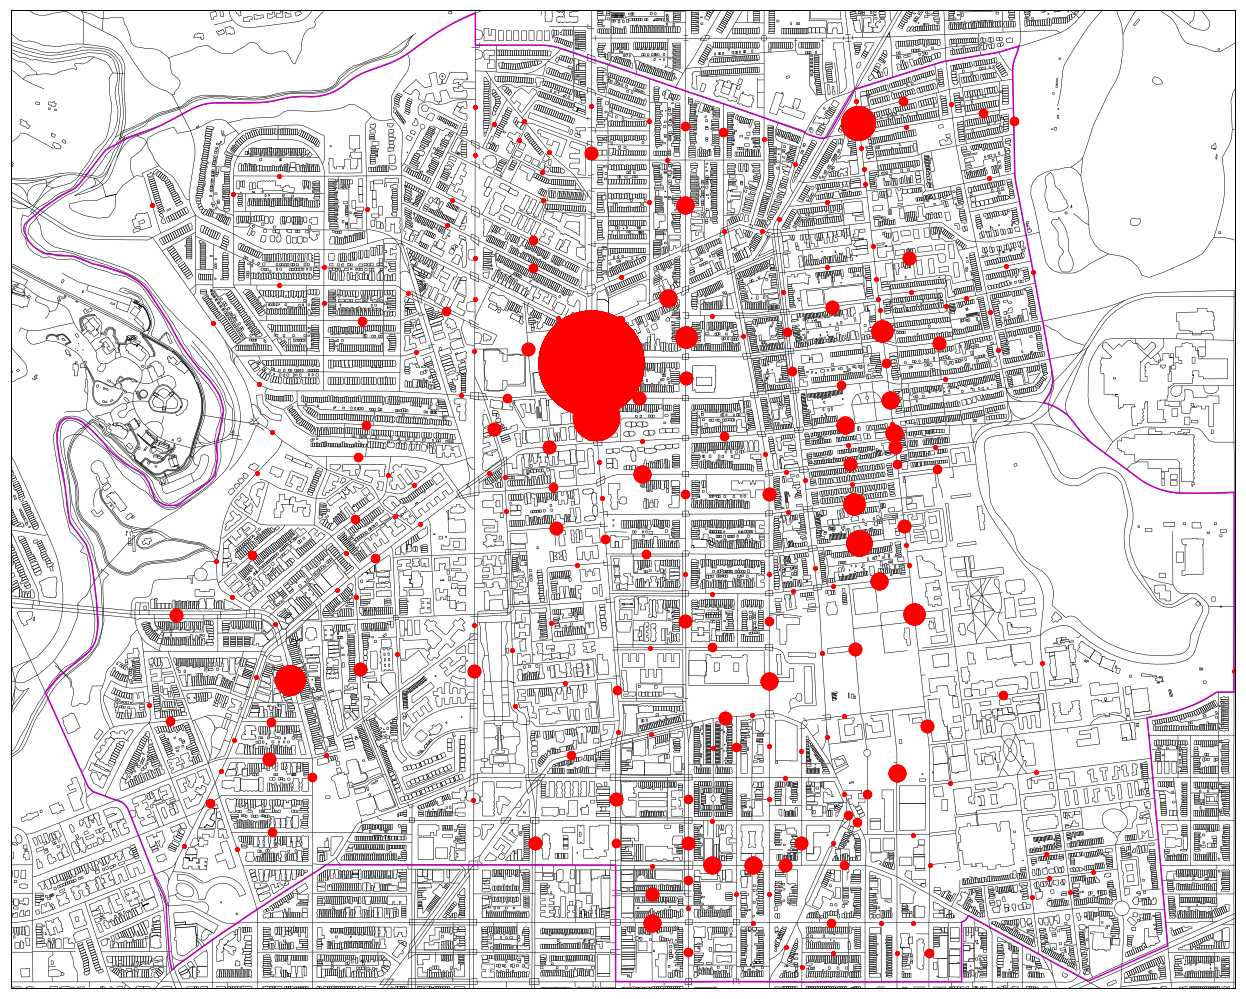

In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
plt.figure(figsize=(36, 18))

map = Basemap(resolution= 'h',projection= 'aea',llcrnrlon=-77.051325, llcrnrlat= 38.913931, urcrnrlon=-77.0121, urcrnrlat=38.938311,lat_0= 38.926139, lon_0= -77.031688)
map.drawcoastlines()
map.drawmapboundary(fill_color= 'aqua') #fills map with aqua
map.fillcontinents(color='white', lake_color='aqua') #fills continents with coral and lakes with aqua

os.chdir(os.environ['data_dir'])
os.chdir('Ward_from_2012')

#os.chdir(r'D:\OneDrive - University of South Carolina - Moore School of Business\DC_crime\Data\Ward_from_2012')

map.readshapefile('Ward_from_2012', 'ward_shapefile', drawbounds = False)

os.chdir(os.environ['data_dir'])
os.chdir('geofabrik')

#os.chdir(r'D:\OneDrive - University of South Carolina - Moore School of Business\DC_crime\Data\geofabrik')

map.readshapefile('roads_free_1', 'roads')

map.readshapefile('buildings_a_free_1', 'buildings')

map.readshapefile('water_a_free_1', 'water1')

map.readshapefile('waterways_free_1', 'water2')


os.chdir(os.environ['data_dir'])
os.chdir('test_crime_shapefile')


map.readshapefile('latlon', 'crime')

for info, shape in zip(map.ward_shapefile_info, map.ward_shapefile):
    if info['WARD'] == 1:
        x, y = zip(*shape) 
        map.plot(x, y, marker=None,color='m')



for info, crime in zip(map.crime_info, map.crime):
    map.plot(crime[0], crime[1], marker='o', color='r', markersize=7*.6*map.crime.count(crime))
plt.show()
